# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [1]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
        
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
  x = x0
  niter = 0
  while True:
    x_prev = x
    x = x - f(x) / fder(x)
    niter += 1
    if abs(x - x_prev) < eps:
      return x, niter
    if niter >= maxiter:
      raise ValueError("Maximum number of iterations exceeded.")


### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [3]:
# ... ENTER YOUR CODE HERE ...

def f(x):
    return x**2 - 1

def fder(x):
    return 2*x


root, iteration_count = newton_iteration(f, fder, 0.05)

print(root)
print(iteration_count)

1.0000000000149214
8


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [4]:
# ... ENTER YOUR CODE HERE ...

def modified_newton_iteration(f, fder, x0, m, eps=1e-5, maxiter=1000):
    x = x0
    niter = 0
    
    while True:
        x_prev = x
        x = x - m * f(x) / fder(x)
        niter += 1
        
        if abs(x - x_prev) < eps:
            return x, niter
        
        if niter >= maxiter:
            return x, niter
            break

def f(x):
    return (x**2 - 1)**2

def fder(x):
    return 4 * x * (x**2 - 1)

x0 = 1.5
epsilon = 1e-5
maxiter=1000
for m in range(1, 6):
    root, iterations = modified_newton_iteration(f, fder, x0, m, epsilon,maxiter)
    if (iterations>=maxiter):
      print(f"No se alcanza la convergencia para m = {m}")
    else:
      print(f"m = {m}:")
      print("Root:", root)
      print("Iterations:", iterations)
      print()


m = 1:
Root: 1.0000057591705684
Iterations: 17

m = 2:
Root: 1.000000000013107
Iterations: 4

m = 3:
Root: 0.9999978588127855
Iterations: 17

No se alcanza la convergencia para m = 4
No se alcanza la convergencia para m = 5


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

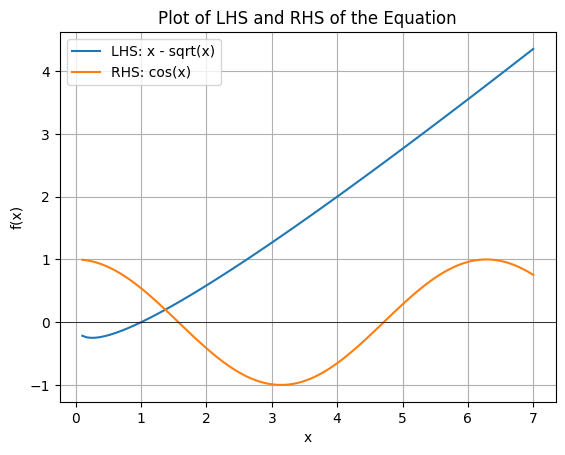

Fixed-Point Iteration Result:
Root: 1.3699454974006748
Iterations: 20
Optimal Alpha: 3.7145356243893977
Alpha: 0.100000
Root: 0.6416485738150456
Iterations: 59

Alpha: 0.501615
Root: 0.641710095863861
Iterations: 11

Alpha: 0.903230
Root: 0.6417142163790082
Iterations: 6

Alpha: 1.304845
Root: 0.6417169547121604
Iterations: 21

Alpha: 1.706460
Root: None
Iterations: 1000

Alpha: 2.108075
Root: None
Iterations: 1000

Alpha: 2.509690
Root: None
Iterations: 1000

Alpha: 2.911305
Root: None
Iterations: 1000

Alpha: 3.312921
Root: None
Iterations: 1000

Alpha: 3.714536
Root: None
Iterations: 1000



In [12]:
# ... ENTER YOUR CODE HERE ...

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1, 7, 100)
lhs = x - np.sqrt(x)
rhs = np.cos(x)

plt.plot(x, lhs, label='LHS: x - sqrt(x)')
plt.plot(x, rhs, label='RHS: cos(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of LHS and RHS of the Equation')
plt.grid(True)
plt.show()



def f(x):
    return np.sqrt(x) + np.cos(x)

def fixed_point_iteration(x0, epsilon=1e-5, maxiter=1000):
    x = x0
    niter = 0
    
    while True:
        x_new = f(x)
        niter += 1
        
        if abs(x_new - x) < epsilon:
            return x_new, niter
        
        if niter >= maxiter:
            raise ValueError("Maximum number of iterations exceeded.")
        
        x = x_new

x0 = 0.5
root, iterations = fixed_point_iteration(x0)
print("Fixed-Point Iteration Result:")
print("Root:", root)
print("Iterations:", iterations)




def f(x):
    if x >= 0:
        return np.sqrt(x) - np.cos(x)
    else:
        return np.nan

def f_prime(x):
    return 0.5 / np.sqrt(x) + np.sin(x)

def fixed_point_iteration_alpha(x0, alpha, epsilon=1e-5, maxiter=1000):
    x = x0
    niter = 0
    
    while True:
        x_new = x - alpha * f(x)
        niter += 1
        
        if abs(x_new - x) < epsilon:
            return x_new, niter
        
        if niter >= maxiter:
            return None, niter
        
        x = x_new

x0 = 0.5
epsilon = 1e-5
localization_interval = [0.5, 1.0] 

m = np.min(np.abs(f_prime(localization_interval)))
M = np.max(np.abs(f_prime(localization_interval)))

optimal_alpha = 2 * m + M
print("Optimal Alpha:", optimal_alpha)

alpha_values = np.linspace(0.1, 2 * m + M, 10)
for alpha in alpha_values:
    root, iterations = fixed_point_iteration_alpha(x0, alpha, epsilon=epsilon)
    print(f"Alpha: {alpha:.6f}")
    print("Root:", root)
    print("Iterations:", iterations)
    print()

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

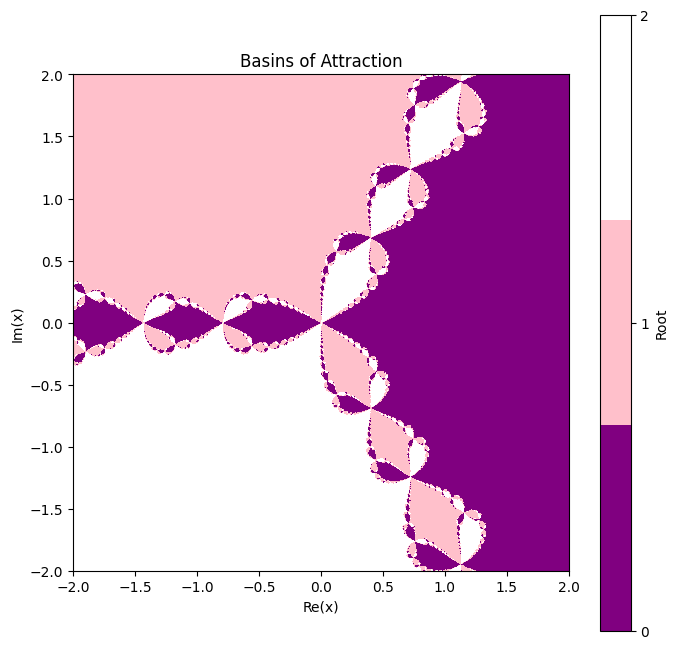

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def f(x):
    return x**3 - 1

def newton_iteration_complex(x0, epsilon=1e-5, maxiter=100):
    x = x0
    niter = 0

    while True:
        x_new = x - f(x) / (3 * x**2)
        niter += 1

        if np.abs(x_new - x) < epsilon or niter >= maxiter:
            return x_new
        
        x = x_new


real_range = np.linspace(-2, 2, 1000)
imag_range = np.linspace(-2, 2, 1000)
grid = np.meshgrid(real_range, imag_range)
complex_grid = grid[0] + 1j * grid[1]

root_colors = np.zeros_like(complex_grid, dtype=int)
roots = [np.exp(1j * 2 * np.pi * k / 3) for k in range(3)]

for i in range(complex_grid.shape[0]):
    for j in range(complex_grid.shape[1]):
        root = newton_iteration_complex(complex_grid[i, j])
        if np.isclose(root, roots[0]):
            root_colors[i, j] = 0
        elif np.isclose(root, roots[1]):
            root_colors[i, j] = 1
        elif np.isclose(root, roots[2]):
            root_colors[i, j] = 2

custom_cmap = ListedColormap(['purple', 'pink', 'white'])

plt.figure(figsize=(8, 8))
plt.imshow(root_colors, extent=(-2, 2, -2, 2), cmap=custom_cmap, origin='lower')
plt.colorbar(ticks=[0, 1, 2], label='Root')
plt.xlabel('Re(x)')
plt.ylabel('Im(x)')
plt.title('Basins of Attraction')
plt.show()
